## Topic 1 Image Classification Assignment Group 6 


## Deep Learning Assignment
### Task name: Intel image classification
#### Group 6
Ming Xu 2070370 \
Yasmin Lin 2070056 \
Guoliang Zhou 2074934 \
Sunse Kwon 2076460

In [3]:
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator 


# set the directory based on the folder where you saved dataset
train_data_dir = 'C:/Users/Yasmin Lin/OneDrive/M DSS/Block 3/Deep Learning/Assignment/seg_train/seg_train' 
test_data_dir = 'C:/Users/Yasmin Lin/OneDrive/M DSS/Block 3/Deep Learning/Assignment/seg_test/seg_test'
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_data = image_generator.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir,
                                                 shuffle=True,
                                                 target_size=(64,64), 
                                                 subset="training",
                                                 class_mode='categorical')

val_data = image_generator.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir,
                                                 shuffle=False,
                                                 target_size=(64,64), 
                                                 subset="validation",
                                                 class_mode='categorical')
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(test_data_dir,
                                       target_size=(64,64), batch_size=64, shuffle=False)


print(train_data.classes)
print(val_data.classes)
print()
print(train_data.class_indices)
print(test_data.classes)
class_names = np.unique(train_data.classes)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
[0 0 0 ... 5 5 5]


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import logging
from itertools import cycle

import tensorflow
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import regularizers

import keras
from keras import models
from keras import layers
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

#### Building the baseline model

In [5]:
def build_model():

    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = train_data.image_shape[:], padding ="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding ="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding ="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    
    return model

In [6]:
logging.getLogger('tensorflow').disabled = True 

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [7]:
opt_adam = Adam(learning_rate=0.001)
model.compile(optimizer=opt_adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, epochs=20, batch_size=32, validation_data=val_data)


Epoch 1/20
176/176 [==============================] - 102s 577ms/step - loss: 1.1773 - accuracy: 0.5397 - val_loss: 0.9289 - val_accuracy: 0.6334
Epoch 2/20
176/176 [==============================] - 47s 266ms/step - loss: 0.8432 - accuracy: 0.6808 - val_loss: 0.7408 - val_accuracy: 0.7143
Epoch 3/20
176/176 [==============================] - 45s 255ms/step - loss: 0.7119 - accuracy: 0.7365 - val_loss: 0.6869 - val_accuracy: 0.7447
Epoch 4/20
176/176 [==============================] - 46s 260ms/step - loss: 0.6034 - accuracy: 0.7857 - val_loss: 0.5944 - val_accuracy: 0.7917
Epoch 5/20
176/176 [==============================] - 46s 260ms/step - loss: 0.5472 - accuracy: 0.8062 - val_loss: 0.5840 - val_accuracy: 0.7882
Epoch 6/20
176/176 [==============================] - 45s 256ms/step - loss: 0.4836 - accuracy: 0.8265 - val_loss: 0.5037 - val_accuracy: 0.8220
Epoch 7/20
176/176 [==============================] - 46s 264ms/step - loss: 0.4505 - accuracy: 0.8443 - val_loss: 0.5479 - val_a

In [12]:
test_loss, test_acc = model.evaluate(test_data)

47/47 [==============================] - 14s 284ms/step - loss: 0.9097 - accuracy: 0.8073


#### Plotting accuracy and loss baseline

In [13]:
opt_adam = Adam(learning_rate=0.001)
model.compile(optimizer=opt_adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_test = model.fit(train_data, epochs=20, batch_size=32, validation_data=test_data)

Epoch 1/20
176/176 [==============================] - 77s 435ms/step - loss: 0.0722 - accuracy: 0.9753 - val_loss: 0.9309 - val_accuracy: 0.8030
Epoch 2/20
176/176 [==============================] - 44s 248ms/step - loss: 0.0896 - accuracy: 0.9699 - val_loss: 1.1320 - val_accuracy: 0.7670
Epoch 3/20
176/176 [==============================] - 44s 248ms/step - loss: 0.0520 - accuracy: 0.9826 - val_loss: 1.1229 - val_accuracy: 0.7993
Epoch 4/20
176/176 [==============================] - 45s 254ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 1.1620 - val_accuracy: 0.7973
Epoch 5/20
176/176 [==============================] - 44s 249ms/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 1.2184 - val_accuracy: 0.7913
Epoch 6/20
176/176 [==============================] - 44s 252ms/step - loss: 0.0679 - accuracy: 0.9773 - val_loss: 1.1203 - val_accuracy: 0.7940
Epoch 7/20
176/176 [==============================] - 44s 250ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 1.0994 - val_ac

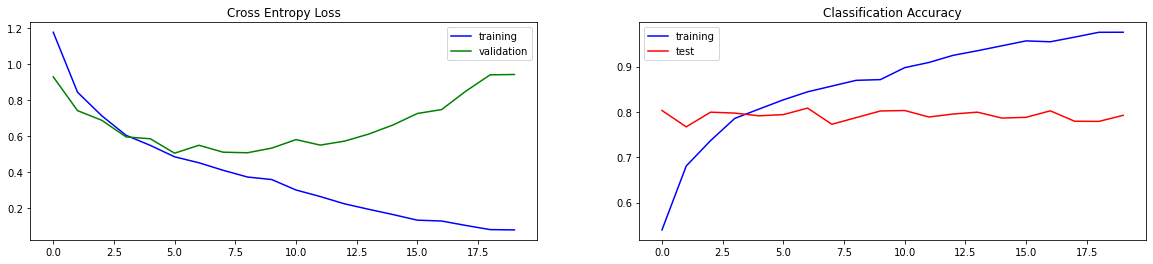

In [16]:
# plot diagnostic learning curves
def summarize_diagnostics(history, history_test):
    plt.figure(figsize= (20,4))
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='green', label='validation')
    plt.legend(['training', 'validation'])
    # plot accuracy
    
    plt.subplot(122)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train') #This is only used for visualization purposes.
    plt.plot(history_test.history['val_accuracy'], color='red', label='test') 
    plt.legend(['training', 'test'])
    plt.savefig('BaselineLossAcc.png')
    plt.show()
 
summarize_diagnostics(history, history_test)

print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_acc}")

#### Here the probability of the classes are gathered and the predictions are made.

In [14]:
y_prob = model.predict(test_data)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_data.classes

47/47 [==============================] - 19s 412ms/step


#### Confusion matrix baseline model

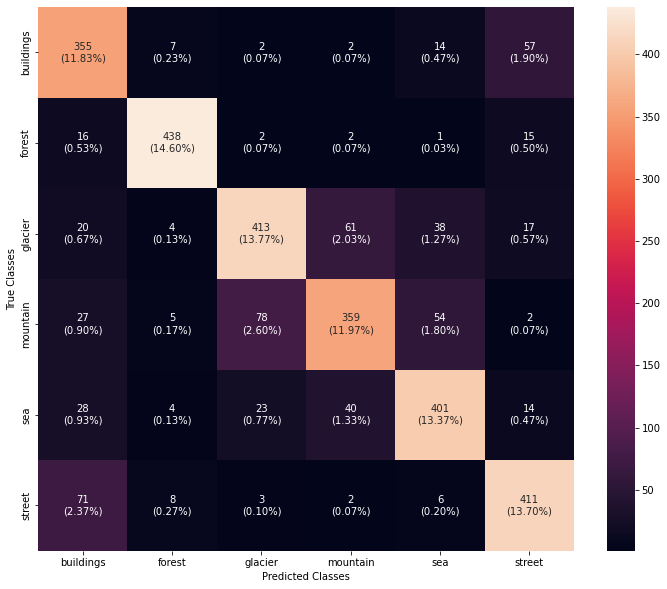

In [15]:
labels = {value: key for key, value in train_data.class_indices.items()}
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="rocket", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.savefig("BaselineCF.png")
plt.show()

In [19]:
#Binarize the labels
train_data.classes = label_binarize(train_data.classes, classes=[0, 1, 2,3,4,5])
n_classes = train_data.classes.shape[1]
print(n_classes)

y_train = label_binarize(train_data.classes, classes=[0,1,2,3,4,5])
y_test = label_binarize(test_data.classes, classes=[0,1,2,3,4,5])
y_val = label_binarize(val_data.classes, classes=[0,1,2,3,4,5])

6


#### ROC curve baseline model

In [20]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes==i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

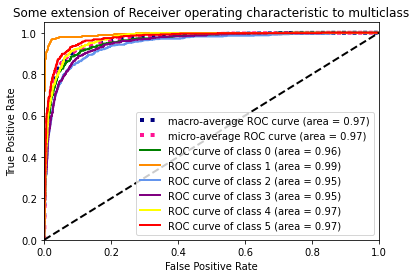

In [26]:
lw = 2 #IDK WHAT THIS IS

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(
#    fpr["micro"],
#    tpr["micro"],
#

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["green", "darkorange", "cornflowerblue", "purple", "yellow", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

#### Performance measures baseline model

In [22]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

   buildings       0.77      0.78      0.77       437
      forest       0.95      0.92      0.93       474
     glacier       0.76      0.78      0.77       553
    mountain       0.72      0.81      0.76       525
         sea       0.81      0.79      0.80       510
      street       0.87      0.77      0.82       501

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



In [27]:
y_prob = model.predict(test_data)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

47/47 [==============================] - 6s 122ms/step
One-vs-One ROC AUC scores:
0.966552 (macro),
0.965966 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.966552 (macro),
0.965966 (weighted by prevalence)


In [12]:
# extracted sensitivity and specificity

FP = cf_mtx.sum(axis=0) - np.diag(cf_mtx)  
FN = cf_mtx.sum(axis=1) - np.diag(cf_mtx)
TP = np.diag(cf_mtx)
TN = cf_mtx.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

np.set_printoptions(precision = 2)
print('Sensitivity:',TPR ,'\n''Specificity:',TNR)

Sensitivity: [0.71 0.92 0.77 0.79 0.79 0.8 ] 
Specificity: [0.97 0.99 0.94 0.94 0.95 0.97]


## Improved CNN model

In [95]:
train_data_dir1 = 'C:/Users/Yasmin Lin/OneDrive/M DSS/Block 3/Deep Learning/Assignment/seg_train/seg_train' 
test_data_dir1 = 'C:/Users/Yasmin Lin/OneDrive/M DSS/Block 3/Deep Learning/Assignment/seg_test/seg_test'
image_generator1 = ImageDataGenerator(rescale=1/255, validation_split=0.2,
                                     rotation_range=20,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode="nearest")    

train_data1 = image_generator1.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir1,
                                                 shuffle=True,
                                                 target_size=(64,64), 
                                                 subset="training",
                                                 class_mode='categorical')

val_data1 = image_generator1.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir1,
                                                 shuffle=False,
                                                 target_size=(64,64), 
                                                 subset="validation",
                                                 class_mode='categorical')
test_gen1 = ImageDataGenerator(rescale=1./255)
test_data1 = test_gen1.flow_from_directory(test_data_dir1,
                                       target_size=(64,64), batch_size=64, shuffle=False)


print(train_data1.classes)
print(val_data1.classes)
print(train_data1.class_indices)
print(test_data1.classes)
class_names = np.unique(train_data1.classes)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
[0 0 0 ... 5 5 5]


In [127]:
def build_model1(kernel_regularizer=regularizers.l2(0.0005), rate=0.5):
    
    model = keras.Sequential([
    layers.Input((64, 64, 3)),
    
    layers.Conv2D(64, (3,3), activation="relu", padding='same',kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu",padding='same',kernel_regularizer=kernel_regularizer,kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation="relu",padding='same',kernel_regularizer=kernel_regularizer,kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation="relu",kernel_initializer='he_uniform'),
    layers.Dropout(rate=rate),
    layers.Dense(6, activation="softmax")])
    
    opt_adam = Adam(learning_rate=0.001)
    model.compile(optimizer=opt_adam, loss=tensorflow.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [129]:
logging.getLogger('tensorflow').disabled = True 
cnn_model = build_model1()
cnn_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_72 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_73 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                     

In [130]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
history_cnn = cnn_model.fit(train_data1, epochs=40, batch_size=32, validation_data=val_data1, verbose=1, callbacks=[reduce_lr])

Epoch 1/40
176/176 [==============================] - 74s 418ms/step - loss: 1.4339 - accuracy: 0.4923 - val_loss: 2.4963 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 2/40
176/176 [==============================] - 76s 431ms/step - loss: 1.1939 - accuracy: 0.5744 - val_loss: 1.1369 - val_accuracy: 0.6312 - lr: 0.0010
Epoch 3/40
176/176 [==============================] - 73s 413ms/step - loss: 1.0852 - accuracy: 0.6217 - val_loss: 0.9700 - val_accuracy: 0.6748 - lr: 0.0010
Epoch 4/40
176/176 [==============================] - 76s 430ms/step - loss: 1.0334 - accuracy: 0.6388 - val_loss: 0.9724 - val_accuracy: 0.6605 - lr: 0.0010
Epoch 5/40
176/176 [==============================] - 77s 436ms/step - loss: 0.9747 - accuracy: 0.6736 - val_loss: 0.8853 - val_accuracy: 0.6972 - lr: 0.0010
Epoch 6/40
176/176 [==============================] - 76s 432ms/step - loss: 0.9338 - accuracy: 0.6875 - val_loss: 0.8322 - val_accuracy: 0.7286 - lr: 0.0010
Epoch 7/40
176/176 [==============================] 

In [131]:
test_loss1, test_acc1 = cnn_model.evaluate(test_data1, batch_size=32)

47/47 [==============================] - 19s 411ms/step - loss: 0.5212 - accuracy: 0.8450


#### Plotting accuracy and loss CNN model

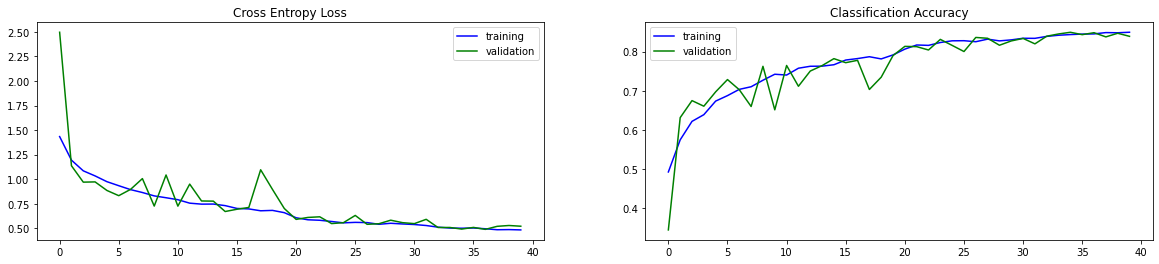

In [132]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.figure(figsize= (20,4))
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(history_cnn.history['loss'], color='blue', label='train')
    plt.plot(history_cnn.history['val_loss'], color='green', label='validation')
    plt.legend(['training', 'validation'])
    
    # plot accuracy
    plt.subplot(122)
    plt.title('Classification Accuracy')
    plt.plot(history_cnn.history['accuracy'], color='blue', label='train')
    plt.plot(history_cnn.history['val_accuracy'], color='green', label='validation')
    plt.legend(['training', 'validation'])
    plt.savefig('BestModelLossAcc.png')
    plt.show()
 
summarize_diagnostics(history_cnn)

#### Predictions CNN model

In [133]:
y_prob1 = cnn_model.predict(test_data1)
y_pred1 = np.argmax(y_prob1, axis=1)
y_true1 = test_data1.classes

47/47 [==============================] - 5s 107ms/step


#### Confusion matrix CNN model

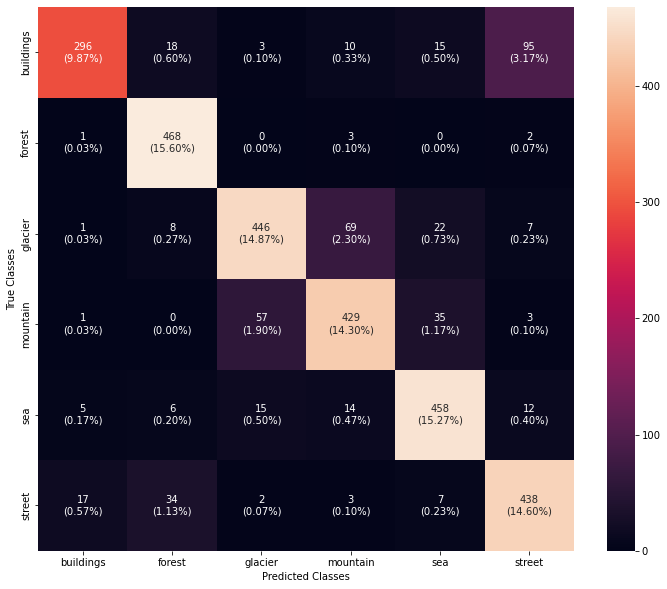

In [134]:
labels = {value: key for key, value in train_data.class_indices.items()}
cf_mtx = confusion_matrix(y_true1, y_pred1)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="rocket", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.savefig("BestModelCF.png")
plt.show()

#### ROC curve CNN model

In [135]:
train_data.classes = label_binarize(train_data.classes, classes=[0, 1, 2,3,4,5])
n_classes = train_data.classes.shape[1]
print(n_classes)

y_train1 = label_binarize(train_data.classes, classes=[0,1,2,3,4,5])
y_test1 = label_binarize(test_data.classes, classes=[0,1,2,3,4,5])
y_val1 = label_binarize(val_data.classes, classes=[0,1,2,3,4,5])

6


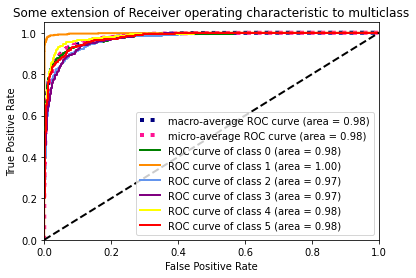

In [136]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data1.classes==i, y_prob1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_prob1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2 

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(
#    fpr["micro"],
#    tpr["micro"],
#

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["green", "darkorange", "cornflowerblue", "purple", "yellow", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.savefig("cnn_modelROC.png")
plt.show()

In [137]:
macro_roc_auc_ovo = roc_auc_score(y_test1, y_prob1, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test1, y_prob1, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test1, y_prob1, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test1, y_prob1, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.979673 (macro),
0.979352 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.979673 (macro),
0.979352 (weighted by prevalence)


#### Performance measures CNN model

In [138]:
print(classification_report(y_true1, y_pred1, target_names=labels.values()))

              precision    recall  f1-score   support

   buildings       0.92      0.68      0.78       437
      forest       0.88      0.99      0.93       474
     glacier       0.85      0.81      0.83       553
    mountain       0.81      0.82      0.81       525
         sea       0.85      0.90      0.87       510
      street       0.79      0.87      0.83       501

    accuracy                           0.84      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.84      0.84      3000



In [140]:
# extracted sensitivity and specificity

FP = cf_mtx.sum(axis=0) - np.diag(cf_mtx)  
FN = cf_mtx.sum(axis=1) - np.diag(cf_mtx)
TP = np.diag(cf_mtx)
TN = cf_mtx.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

np.set_printoptions(precision = 2)
print('Sensitivity:',TPR ,'\n''Specificity:',TNR)

Sensitivity: [0.68 0.99 0.81 0.82 0.9  0.87] 
Specificity: [0.99 0.97 0.97 0.96 0.97 0.95]
